In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('apples_and_oranges.csv')

In [4]:
df1.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
df1.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


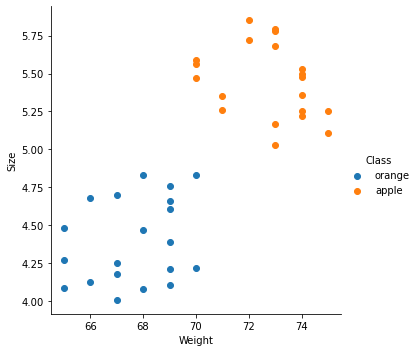

In [8]:
g1 = sns.FacetGrid(df1, hue = 'Class', height = 5)
g1.map(plt.scatter, 'Weight', 'Size')
g1.add_legend()

In [13]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(df1, test_size = 0.2, random_state = 1)

In [14]:
trainset.shape

(32, 3)

<AxesSubplot:xlabel='Weight', ylabel='Size'>

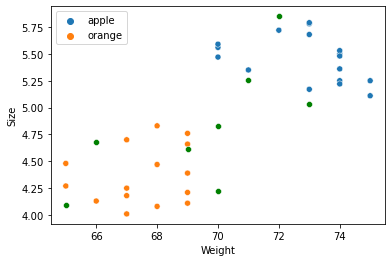

In [16]:
sns.scatterplot(x = 'Weight', y = 'Size', data = trainset, hue = 'Class')
sns.scatterplot(x = 'Weight', y = 'Size', data = testset, color = 'g')

In [19]:
Xtrain = trainset[['Weight','Size']].values
ytrain = trainset['Class'].values

Xtest = testset[['Weight','Size']].values
ytest = testset['Class'].values

In [30]:
ytrain.shape

(32,)

In [29]:
# membuat knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn1 = KNeighborsClassifier(n_neighbors = 1)

knn1.fit(Xtrain,ytrain)

ypred = knn1.predict(Xtest)

print('accuracy:', accuracy_score(ytest, ypred))

accuracy: 0.875


In [35]:
list_akurasi = []

for k in range(1,25):
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(Xtrain, ytrain)
    ypred = knn1.predict(Xtest)
    nilai_akurasi = accuracy_score(ytest, ypred)
    list_akurasi.append(nilai_akurasi)

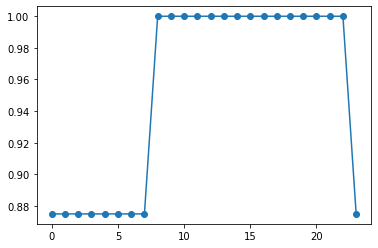

In [37]:
plt.plot(list_akurasi, marker = 'o')